# Ensemble of Regression Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# RandomForestRegressor is for Bagging and Random Forest

In [5]:
boston_df = pd.read_csv('Boston.csv')
boston_df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
X = boston_df.drop('medv',axis =1)
y = boston_df.medv

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

#### Single Tree

In [8]:
tree1 = DecisionTreeRegressor(max_depth=4)
tree1.fit(X_train,y_train)
pred1 = tree1.predict(X_test)
mspe = mean_squared_error(y_test,pred1)
mspe

23.81737151382862

In [9]:
xaxis = np.linspace(0,50,100)

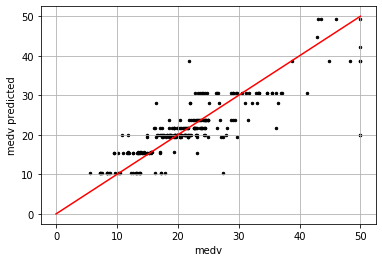

In [10]:
# plt.figure(figsize=(12,6))
plt.scatter(y_test,pred1,s = 6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

## Bagging on B=500 Regression Trees

All p=13 predictors will be considered at each split of the tree<br>
m = max_features = n. of predictors = p

In [11]:
bag500 = RandomForestRegressor(max_features=13,
                                      max_depth=4,
                                      n_estimators = 500,
                                      random_state=1)
bag500.fit(X_train,y_train);

In [12]:
pred2 = bag500.predict(X_test)
mean_squared_error(y_test,pred2)

17.478380407764742

In [13]:
# significantly lower than that of a single tree

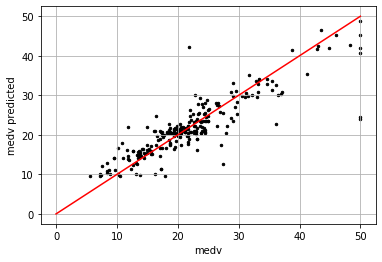

In [14]:
# plt.figure(figsize=(12,6))
plt.scatter(y_test,pred2,s = 6,color='k')
plt.plot(xaxis,xaxis,color='r')
plt.xlabel('medv')
plt.ylabel('medv predicted')
plt.grid()

In [15]:
# Comparison plot

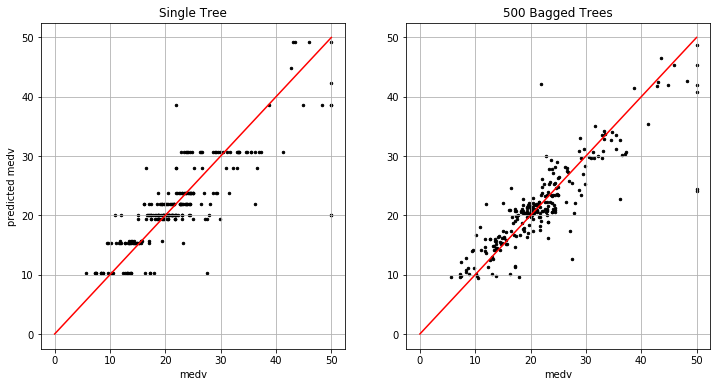

In [16]:
figure,(ax0,ax1) = plt.subplots(ncols = 2,figsize=(12,6))
# single tree plot
ax0.scatter(y_test,pred1,s = 6,color='k')
ax0.plot(xaxis,xaxis,color='r')
ax0.set_xlabel('medv')
ax0.set_ylabel('predicted medv')
ax0.title.set_text('Single Tree')
ax0.grid()
# bagging plot
ax1.scatter(y_test,pred2,s = 6,color='k')
ax1.plot(xaxis,xaxis,color='r')
ax1.set_xlabel('medv')
ax1.title.set_text('500 Bagged Trees')
ax1.grid()

### reduce the number of trees from B=500 to B=25

In [17]:
bag25 = RandomForestRegressor(max_features=13,max_depth=4,
                                      n_estimators = 25,
                                      random_state = 1)
bag25.fit(X_train,y_train);

In [18]:
pred = bag25.predict(X_test)
mean_squared_error(y_test,pred)

18.44417466060871

In [19]:
# not much higher than test MSE with 500 trees

## Random Forest on Regression Trees

Not all 13 predictors will be considered at each split<br>
m = max_features m < n. predictors p

In [20]:
# I will use m = 6

In [21]:
forest1 = RandomForestRegressor(max_features = 6,
                                max_depth = 4,
                                n_estimators = 500,
                                random_state = 1)
forest1.fit(X_train,y_train)
pred = forest1.predict(X_test)
mean_squared_error(y_test,pred)

17.422687925081952

In [22]:
# slightly smaller (better) than bagging

### importance of each predictor (feature)

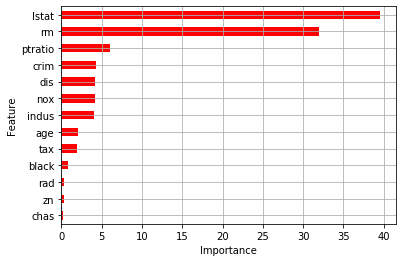

In [23]:
Importance = pd.DataFrame({'Importance':forest1.feature_importances_*100},
                          index = X.columns)
df8 = Importance.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df8.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid()

across all of the trees in the random forest
the wealth level of the community ('lstat') and the house size ('rm')
are the two most important predictors

## Gradient Boosting (0.10  is default value learning rate)

In [24]:
# I will limit the depth of the trees to 4 splits

In [25]:
boost10 = GradientBoostingRegressor(n_estimators = 500, 
                                    learning_rate = 0.1,
                                    max_depth = 4, 
                                    random_state =1)
boost10.fit(X_train,y_train)
mean_squared_error(y_test,boost10.predict(X_test))

17.142902092746105

In [26]:
Importance2 = boost10.feature_importances_*100
Importance2 = pd.DataFrame({'Importance':Importance2},index = X.columns)

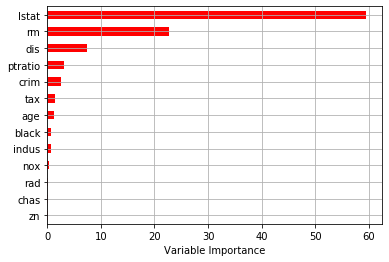

In [27]:
df9 = Importance2.sort_values(by = 'Importance',axis = 0,
                             ascending = True)
df9.plot(kind = 'barh',color = 'r',legend = False)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

lstat and rm are the two most important features

### change learning_rate to 0.40

In [28]:
boost40 = GradientBoostingRegressor(n_estimators = 500,
                                    learning_rate = 0.40,
                                    max_depth = 4, 
                                    random_state=1)
boost40.fit(X_train,y_train)
mean_squared_error(y_test,boost40.predict(X_test))

16.5813261868549

### GridSearchCV on Gradient boosting learning_rate

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
lrates = np.linspace(0.01,1,9)
lrates

array([0.01   , 0.13375, 0.2575 , 0.38125, 0.505  , 0.62875, 0.7525 ,
       0.87625, 1.     ])

In [31]:
params = dict(learning_rate = lrates)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

In [33]:
model = GradientBoostingRegressor(n_estimators = 500,
                                  max_depth = 4, 
                                  random_state=1)

In [34]:
# I will use 5-fold CV in the search

In [35]:
grid1 = GridSearchCV(model,param_grid = params,
                    scoring = 'neg_mean_squared_error',cv = 5)
grid1.fit(X_train,y_train)
-grid1.score(X_test,y_test)

15.16231211322207

In [36]:
grid1.best_params_

{'learning_rate': 0.2575}

In [37]:
# Refine params values

In [38]:
lrates = np.linspace(0.20,0.26,22)
params = dict(learning_rate = lrates)
lrates

array([0.2       , 0.20285714, 0.20571429, 0.20857143, 0.21142857,
       0.21428571, 0.21714286, 0.22      , 0.22285714, 0.22571429,
       0.22857143, 0.23142857, 0.23428571, 0.23714286, 0.24      ,
       0.24285714, 0.24571429, 0.24857143, 0.25142857, 0.25428571,
       0.25714286, 0.26      ])

In [39]:
grid2 = GridSearchCV(model,param_grid = params,
                    scoring = 'neg_mean_squared_error',cv = 5)
grid2.fit(X_train,y_train)
-grid2.score(X_test,y_test)

TypeError: __init__() got an unexpected keyword argument 'iid'

In [ ]:
grid2.best_params_

In [ ]:
# did not improve. I will keep 0.2575 as best param value.